
## CNN With Custom Images

The dataset contains 2 folders - Infected - Uninfected

And a total of 27,558 images.


This Dataset is taken from the official NIH Website: https://ceb.nlm.nih.gov/repositories/malaria-datasets/ 

In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# my_data_dir = '/content/drive/MyDrive/Clarusway - ML2/3- Classes & Labs/2- DL/DL-S7-(CNN_Image_Classification_Malaria)_12_Mar_2022/cell_images'

In [ ]:
my_data_dir = '../input/dog-cat/data'

In [ ]:
# pwd

In [ ]:
# CONFIRM THAT THIS REPORTS BACK 'test', and 'train'
os.listdir(my_data_dir) 

['validation', 'test', 'train']

In [ ]:
test_path = my_data_dir+'/test/'
train_path = my_data_dir+'/train/'
validation_path = my_data_dir+'/validation/'
cat_path = train_path+'cat/'
dog_path = train_path+'dog/'

In [ ]:
os.listdir(train_path)

['dog', 'cat']

In [ ]:
os.listdir(cat_path)[7]

'cat.2842.jpg'

In [ ]:
cat_img = cat_path+'cat.2842.jpg'

In [ ]:
cat_img = imread(cat_img)

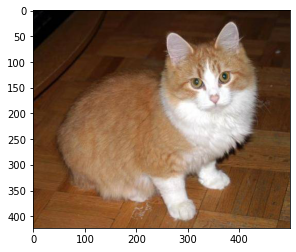

In [ ]:
plt.imshow(cat_img)

In [ ]:
cat_img.shape

(423, 499, 3)

In [ ]:
one_dog = train_path+'dog/'+os.listdir(train_path+'dog')[7]

In [ ]:
def see(file):
    img = imread(file)
    plt.imshow(img)

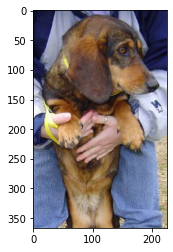

In [ ]:
see(one_dog)

**Let's check how many images there are.**

In [ ]:
len(os.listdir(cat_path))

12500

In [ ]:
len(os.listdir(dog_path))

5026

**Let's find out the average dimensions of these images.**

In [ ]:
train_path

'../input/dog-cat/data/train/'

In [ ]:
#collect sizes of images
def collect_sizes(path) :
    x= []
    y = []
    for image in os.listdir(path):

        img = imread(path+'/'+image)
        d1,d2,colors = img.shape
        x.append(d1)
        y.append(d2)
    return x, y

In [ ]:
x, y = collect_sizes(cat_path)

<AxesSubplot:>

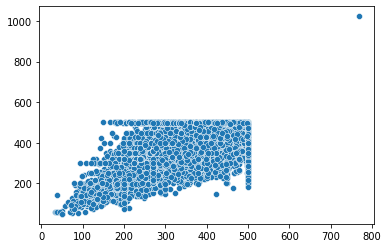

In [ ]:
sns.scatterplot(x,y)

There are some outliers, or just one.

In [ ]:
images = []
for image in os.listdir(cat_path):
    path =cat_path+image
    img = imread(path)
    d1,d2,colors = img.shape
    if(d1 > 600):
        images.append(image)
#     x.append(d1)
#     y.append(d2)
images

['cat.835.jpg']

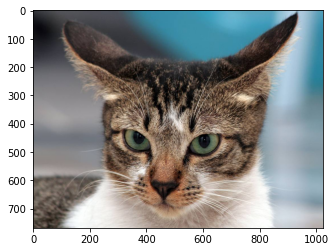

In [ ]:
cat = cat_path+images[0]
see(cat)

In [ ]:
np.mean(x), np.mean(y)

(356.46712, 410.52264)

In [ ]:
x, y = collect_sizes(dog_path)

<AxesSubplot:>

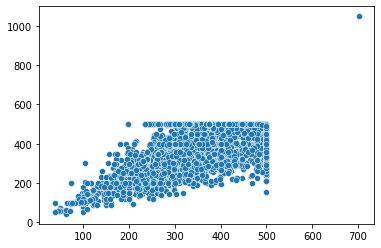

In [ ]:
sns.scatterplot(x,y)

In [ ]:
images = []
for image in os.listdir(train_path+'dog'):
    path =train_path+'dog/'+image
    img = imread(path)
    d1,d2,colors = img.shape
    if(d1 > 600):
        images.append(image)
#     x.append(d1)
#     y.append(d2)
images

['dog.2317.jpg']

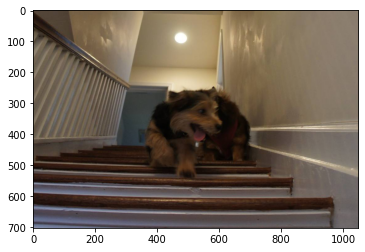

In [ ]:
dog = dog_path+images[0]
see(dog)

In [ ]:
np.mean(x), np.mean(y)

(365.0505372065261, 398.9930362116992)

scale-up ve scale-down yapmam gerekecek. bana en uygun boyutu belirledim.

In [ ]:
image_shape = (350,410,3)

## Preparing the Data for the model

In [ ]:
dog_img = imread(dog)
dog_img.max()

255

In [ ]:
cat_img = imread(cat)
cat_img.max()

255

I will need to rescale the images.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
image_gen = ImageDataGenerator(rotation_range=15, 
                               width_shift_range=0.10, 
                               height_shift_range=0.10, 
                               rescale=1/255, 
                               shear_range=0.1, 
                               zoom_range=0.1, 
                               horizontal_flip=True, 
                               fill_mode='nearest')

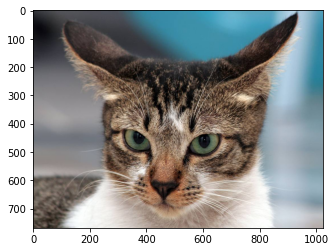

In [ ]:
plt.imshow(cat_img)

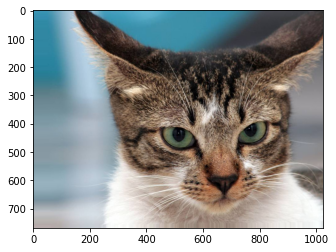

In [ ]:
plt.imshow(image_gen.random_transform(cat_img))

In [ ]:
image_gen.flow_from_directory(train_path)

Found 17526 images belonging to 2 classes.


In [ ]:
test_path

'../input/dog-cat/data/test/'

In [ ]:
image_gen.flow_from_directory(test_path)

Found 0 images belonging to 0 classes.


# Creating the Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

2022-03-17 04:45:44.903181: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-17 04:45:45.003218: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-17 04:45:45.004330: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-17 04:45:45.006636: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 348, 408, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 174, 204, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 172, 202, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 86, 101, 64)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 84, 99, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 42, 49, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 131712)            0

## Early Stopping

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)

## Training the Model

In [ ]:
#help(image_gen.flow_from_directory)

In [ ]:
batch_size = 16
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 17526 images belonging to 2 classes.


In [ ]:
val_image_gen = image_gen.flow_from_directory(validation_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 2290 images belonging to 2 classes.


In [ ]:
train_image_gen.class_indices

{'cat': 0, 'dog': 1}

In [ ]:
val_image_gen.class_indices

{'cat': 0, 'dog': 1}

In [ ]:
# model.fit(x_train,y_train, batch_size=32, epochs=10, validation_data=(x_test,y_test))

In [ ]:
results = model.fit_generator(train_image_gen,epochs=20,
                              validation_data=val_image_gen, callbacks=[early_stop])

2022-03-17 04:45:51.625384: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20


2022-03-17 04:45:53.574751: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1096/1096 [==============================] - 612s 552ms/step - loss: 0.5981 - accuracy: 0.7258 - val_loss: 0.6543 - val_accuracy: 0.6271
Epoch 2/20
1096/1096 [==============================] - 603s 551ms/step - loss: 0.5643 - accuracy: 0.7314 - val_loss: 0.6301 - val_accuracy: 0.6336
Epoch 3/20
1096/1096 [==============================] - 600s 547ms/step - loss: 0.5235 - accuracy: 0.7526 - val_loss: 0.5781 - val_accuracy: 0.6961
Epoch 4/20
1096/1096 [==============================] - 604s 551ms/step - loss: 0.4989 - accuracy: 0.7708 - val_loss: 0.5416 - val_accuracy: 0.7271
Epoch 5/20
1096/1096 [==============================] - 602s 549ms/step - loss: 0.4715 - accuracy: 0.7848 - val_loss: 0.5581 - val_accuracy: 0.7131
Epoch 6/20
1096/1096 [==============================] - 601s 548ms/step - loss: 0.4535 - accuracy: 0.7958 - val_loss: 0.5710 - val_accuracy: 0.7192
Epoch 7/20
1096/1096 [==============================] - 604s 551ms/step - loss: 0.4422 - accuracy: 0.7993 - val_loss: 0.570

# Evaluating the Model

In [ ]:
summary = pd.DataFrame(model.history.history)
summary

,loss,accuracy,val_loss,val_accuracy
0,0.598123,0.725779,0.654254,0.627074
1,0.564334,0.731428,0.630108,0.633624
2,0.523494,0.752596,0.578111,0.696070
3,0.498905,0.770798,0.541569,0.727074
4,0.471480,0.784834,0.558078,0.713100
5,0.453478,0.795789,0.571014,0.719214
6,0.442187,0.799327,0.570503,0.720087
7,0.433652,0.806002,0.508028,0.750655
8,0.412406,0.818042,0.657227,0.698690
9,0.405152,0.817699,0.577869,0.714410


In [ ]:
losses = pd.DataFrame(summary.loss, summary.val_loss)

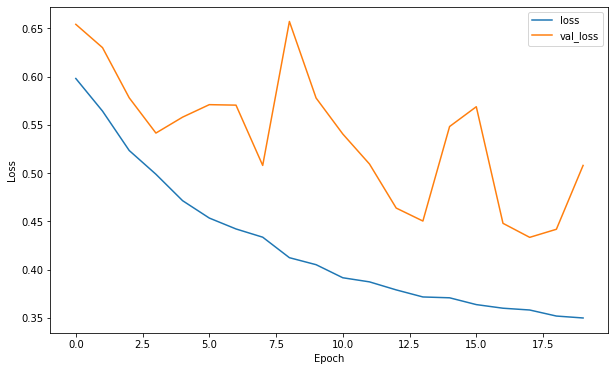

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

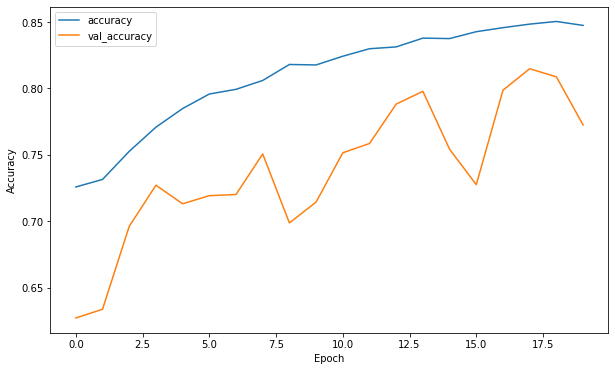

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
model.evaluate_generator(val_image_gen)

[0.5013951659202576, 0.7707423567771912]

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
pred_probabilities = model.predict_generator(val_image_gen)

In [ ]:
pred_probabilities

array([[0.04973758],
       [0.63903785],
       [0.3551538 ],
       ...,
       [0.03785849],
       [0.00576563],
       [0.06645939]], dtype=float32)

In [ ]:
val_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
predictions = pred_probabilities > 0.5

In [ ]:
predictions

array([[False],
       [ True],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(val_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.52      0.70      0.60      1219
           1       0.45      0.28      0.34      1071

    accuracy                           0.50      2290
   macro avg       0.49      0.49      0.47      2290
weighted avg       0.49      0.50      0.48      2290



In [ ]:
confusion_matrix(val_image_gen.classes,predictions)

array([[850, 369],
       [772, 299]])

In [ ]:
model.save('dog_cat_model.h5')

# Predicting on an Image

In [ ]:
one_dog

'../input/dog-cat/data/train/dog/dog.222.jpg'

In [ ]:
my_image = image.load_img(one_dog,target_size=image_shape)

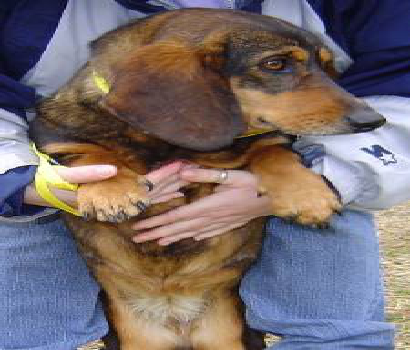

In [ ]:
my_image

In [ ]:
type(my_image)

PIL.Image.Image

In [ ]:
my_image = image.img_to_array(my_image)

In [ ]:
type(my_image)

numpy.ndarray

In [ ]:
my_image.shape

(350, 410, 3)

In [ ]:
my_image = np.expand_dims(my_image, axis=0)

In [ ]:
my_image.shape

(1, 350, 410, 3)

In [ ]:
model.predict(my_image)

array([[1.]], dtype=float32)

In [ ]:
train_image_gen.class_indices

{'cat': 0, 'dog': 1}

In [ ]:
val_image_gen.class_indices

{'cat': 0, 'dog': 1}